In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt 

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('MNIST/data'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [5]:
data = pd.read_csv('../data/train.csv')
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
data = np.array(data)
m, n = data.shape
print(data, m, n,data.shape)
np.random.shuffle(data) # shuffle before splitting into dev and training sets

[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [7 0 0 ... 0 0 0]
 [6 0 0 ... 0 0 0]
 [9 0 0 ... 0 0 0]] 42000 785 (42000, 785)


In [7]:
dev = data[0:1000].T
train = data[1000:m].T
print("dev:",dev)
print("train:",train)

dev: [[8 8 9 ... 4 7 6]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
train: [[4 0 2 ... 2 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [8]:
Y_dev = dev[0]
X_dev = dev[1:n]/255
print("X_dev.shape:",X_dev.shape)
print("Y_dev.shape:",Y_dev.shape)
print("X_dev:",X_dev)
print("Y_dev:",Y_dev)

X_dev.shape: (784, 1000)
Y_dev.shape: (1000,)
X_dev: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Y_dev: [8 8 9 0 0 7 6 1 2 8 4 4 8 3 4 8 7 1 2 8 0 4 0 5 7 4 6 1 4 7 0 9 7 0 1 9 1
 5 4 3 3 7 7 5 2 9 7 8 3 3 7 3 8 9 8 2 9 0 8 7 9 7 2 0 3 2 2 5 2 1 4 0 7 4
 3 8 4 2 9 2 8 8 5 1 2 5 1 5 6 4 6 7 3 4 6 8 8 1 1 7 4 5 5 6 7 3 6 9 3 9 3
 0 4 2 9 5 6 4 2 2 6 3 2 5 8 6 0 7 5 5 5 4 7 4 0 7 8 6 5 9 0 6 5 4 7 4 3 1
 6 1 6 9 2 5 6 9 4 6 9 4 3 2 4 5 8 0 8 9 7 4 4 4 7 9 9 0 8 0 8 7 9 4 4 5 7
 1 3 1 3 3 3 5 1 4 4 5 0 3 1 7 3 5 1 3 5 8 4 2 3 9 0 0 5 3 2 5 6 2 5 0 8 3
 6 7 8 1 7 7 9 5 1 2 0 2 8 6 3 5 7 7 5 5 2 3 5 0 1 3 8 1 4 6 9 4 3 4 4 4 2
 5 1 5 9 2 7 8 3 0 9 6 8 3 3 0 0 2 1 2 4 3 2 3 0 5 5 6 8 6 3 9 1 8 8 7 1 8
 2 4 8 3 9 1 0 0 4 1 5 5 0 3 7 1 0 1 7 8 2 4 3 3 3 7 2 0 1 3 4 4 4 9 9 3 7
 1 5 0 2 8 8 0 1 5 7 4 5 6 8 7 1 2 0 5 4 0 2 4 1 8 1 8 1 6 7 5 6 4 0 2 2 4
 3 4 5 0 1 2 0 0 6 0 0 1 1 1 0 6 5

In [9]:
Y_train = train[0]
X_train = train[1:n]/255
print("X_train.shape:",X_train.shape)
print("Y_train.shape:",Y_train.shape)
print("X_train:",X_train)
print("Y_train:",Y_train)

X_train.shape: (784, 41000)
Y_train.shape: (41000,)
X_train: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Y_train: [4 0 2 ... 2 0 0]


In [10]:
print("X的第一列shape:", X_train[:,0].shape) #x的第一列
print("Label:",Y_train)

X的第一列shape: (784,)
Label: [4 0 2 ... 2 0 0]


In [11]:
def init_params():
    # rand生成(0,1)的值，变为(-0.5,0.5)
    W1 = np.random.rand(10, 784) - 0.5 
    b1 = np.random.rand(10,1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5 
    b2 = np.random.rand(10,1) - 0.5
    return W1, b1, W2, b2
    
def ReLu(Z):
    return np.maximum(0,Z)

def softmax(Z):
    return np.exp(Z)/ sum(np.exp(Z))

def forward_prop(W1,b1,W2,b2,X):
    Z1 = W1.dot(X) + b1
    A1 = ReLu(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2
    
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size,Y.max()+1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

# def one_hot(Y):
#     one_hot_Y = np.zeros((Y.size, Y.max() + 1))
#     one_hot_Y[np.arange(Y.size), Y] = 1
#     one_hot_Y = one_hot_Y.T
#     return one_hot_Y

def ReLU_deriv(Z):
    return Z > 0

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [12]:
one_hot_Y = np.zeros(Y_train.size,Y_train.max()+1)
print(one_hot_Y.shape)
print(one_hot_Y)
print(np.arange(Y_train.size), Y_train)
# print(one_hot_Y[np.arange(Y_train.size), Y_train])

(41000,)
[0 0 0 ... 0 0 0]
[    0     1     2 ... 40997 40998 40999] [4 0 2 ... 2 0 0]


In [13]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print("predictions:", predictions)
    print("label:",Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
#         predictions = get_predictions(A2)
#         print("Iteration: ", i)
#         print("predictions:", predictions, Y)
        if i % 20 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print("Accuracy:",get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [14]:
# training
alpha = 0.1
interations = 500
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, alpha, interations)

Iteration:  0
predictions: [6 7 7 ... 7 0 7]
label: [4 0 2 ... 2 0 0]
Accuracy: 0.0666829268292683
Iteration:  20
predictions: [6 3 4 ... 8 3 0]
label: [4 0 2 ... 2 0 0]
Accuracy: 0.22192682926829269
Iteration:  40
predictions: [4 0 4 ... 6 0 0]
label: [4 0 2 ... 2 0 0]
Accuracy: 0.3428048780487805
Iteration:  60
predictions: [4 0 4 ... 6 0 0]
label: [4 0 2 ... 2 0 0]
Accuracy: 0.46319512195121954
Iteration:  80
predictions: [4 0 4 ... 6 0 0]
label: [4 0 2 ... 2 0 0]
Accuracy: 0.5464146341463415
Iteration:  100
predictions: [4 0 2 ... 6 0 0]
label: [4 0 2 ... 2 0 0]
Accuracy: 0.6061951219512195
Iteration:  120
predictions: [4 0 2 ... 6 0 0]
label: [4 0 2 ... 2 0 0]
Accuracy: 0.6534634146341464
Iteration:  140
predictions: [4 0 2 ... 6 0 0]
label: [4 0 2 ... 2 0 0]
Accuracy: 0.6883170731707317
Iteration:  160
predictions: [4 0 2 ... 6 0 0]
label: [4 0 2 ... 2 0 0]
Accuracy: 0.713170731707317
Iteration:  180
predictions: [4 0 2 ... 6 0 0]
label: [4 0 2 ... 2 0 0]
Accuracy: 0.732146341463

In [15]:
def make_predictions(X,W1,b1,W2,b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index,W1,b1,W2,b2):
    current_image = X_train[:,index,None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print(X_train.shape,X_train)
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

(784, 41000) [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Prediction:  [4]
Label:  4


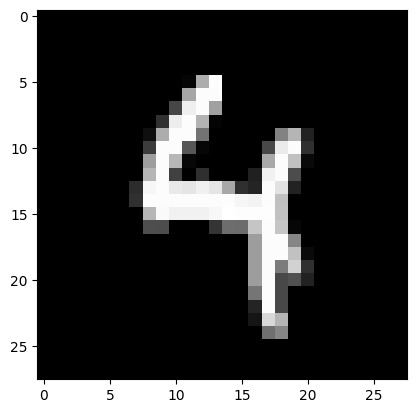

(784, 41000) [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Prediction:  [0]
Label:  0


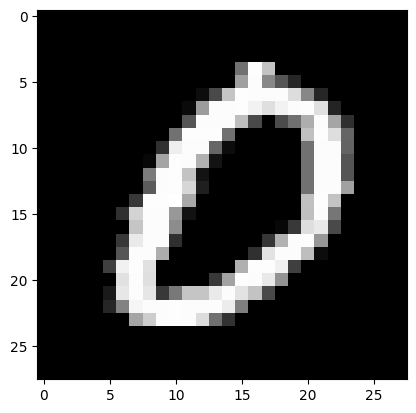

(784, 41000) [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Prediction:  [2]
Label:  2


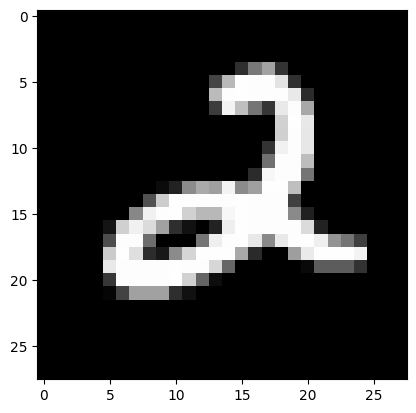

(784, 41000) [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Prediction:  [0]
Label:  0


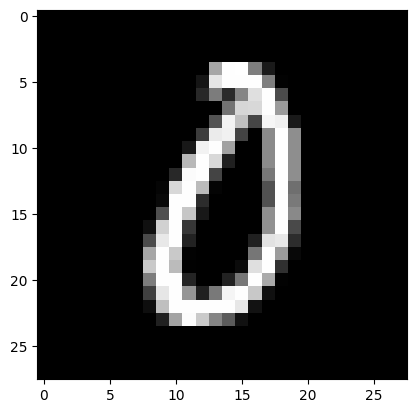

In [16]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [17]:
# Finally, let's find the accuracy on the dev set:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
accuracy = get_accuracy(dev_predictions, Y_dev)
print("Accuracy:",accuracy)

predictions: [8 8 9 0 0 7 6 1 2 8 4 4 2 5 4 8 7 1 8 8 0 4 0 5 7 4 6 1 9 7 0 7 7 0 1 4 1
 3 4 3 3 7 9 5 8 9 7 1 3 7 7 5 8 9 8 2 9 0 8 7 9 9 2 0 3 2 2 9 2 1 4 0 7 4
 3 8 4 2 9 2 1 8 5 1 2 8 1 4 6 4 6 7 3 4 6 5 8 1 1 7 4 2 5 6 7 3 6 9 3 9 3
 0 4 2 9 5 6 4 2 2 6 3 9 5 9 6 5 7 2 5 3 4 7 4 0 7 8 6 5 9 0 6 5 4 7 4 9 1
 6 1 6 9 2 5 6 7 4 6 9 4 3 3 4 5 8 0 8 4 7 4 4 4 7 9 8 0 8 0 8 7 8 4 4 5 7
 1 3 1 3 3 3 5 1 4 4 5 0 3 1 1 3 5 1 3 5 8 4 2 3 9 0 0 5 3 2 5 6 2 0 0 5 3
 4 5 8 1 7 7 9 0 5 3 0 8 8 6 3 3 7 7 6 3 2 3 5 0 8 3 8 1 4 6 9 4 3 4 4 4 2
 5 1 1 9 8 7 1 3 0 9 6 1 3 3 0 0 2 1 2 4 3 2 3 0 0 5 6 8 6 3 9 1 8 8 7 1 8
 2 4 8 3 9 1 0 0 4 1 5 6 0 3 7 1 0 1 7 8 2 4 3 3 3 7 2 6 1 3 4 4 6 5 1 3 7
 1 7 0 2 8 8 0 1 5 7 9 5 2 8 7 1 2 0 5 4 0 2 4 1 8 1 8 1 6 7 3 6 4 0 2 4 4
 3 4 5 0 1 5 0 0 6 8 0 1 7 1 0 6 5 8 8 1 1 1 9 5 3 7 2 7 4 4 0 9 6 1 0 8 8
 5 0 5 5 8 1 5 8 7 7 5 8 6 6 3 0 8 0 1 3 8 2 7 3 9 1 2 1 1 0 9 7 2 7 1 6 0
 8 7 7 0 8 3 4 3 7 4 9 8 9 3 0 9 5 5 0 7 6 7 2 9 9 0 1 3 9 1 9 0 8 5 9 3 7
 9 2 6 1 1 1